# Data and Imports

In [2]:
%run Imports.ipynb
name = 'Kred'

rf_df = pd.read_pickle('../outputs/importances/rf_importances.pickle')
xgb0 = pd.read_pickle('../outputs/importances/Feat_Import_XGBoost0.pickle')

In [3]:
rf_df.head()

,Feature_RF,Importance_RF
0,kontoconnect.basicfeatures.basic_currencybalan...,0.010
1,kontoconnect.basicfeatures.basic_maxratiodaysw...,0.007
2,kontoconnect.basicfeatures.basic_maxratioposac...,0.006
3,kontoconnect.basicfeatures.basic_minsdposaccba...,0.005
4,kontoconnect.basicfeatures.basic_maxrationear0...,0.006


In [5]:
rf_df.tail()

,Feature_RF,Importance_RF
401,fingerprint.language_base_expand_es,0.001
402,fingerprint.language_base_expand_ca,0.000
403,fingerprint.language_base_expand_newvalue,0.001
404,fingerprint.language_woe,0.004
405,amountdifference,0.008


In [4]:
xgb0.head()

,Feature_XGBoost0,Importance_XGBoost0
0,kontoconnect.basicfeatures.basic_currencybalan...,0.006
1,kontoconnect.basicfeatures.basic_maxratiodaysw...,0.007
2,kontoconnect.basicfeatures.basic_maxratioposac...,0.004
3,kontoconnect.basicfeatures.basic_minsdposaccba...,0.003
4,kontoconnect.basicfeatures.basic_maxrationear0...,0.007


In [6]:
xgb0.tail()

,Feature_XGBoost0,Importance_XGBoost0
401,fingerprint.language_base_expand_es,0.000
402,fingerprint.language_base_expand_ca,0.003
403,fingerprint.language_base_expand_newvalue,0.009
404,fingerprint.language_woe,0.002
405,amountdifference,0.018


# Checking if same features

In [14]:
print(set(list(rf_df[rf_df.columns[0]] == xgb0[xgb0.columns[0]])))

{True}


# Plots

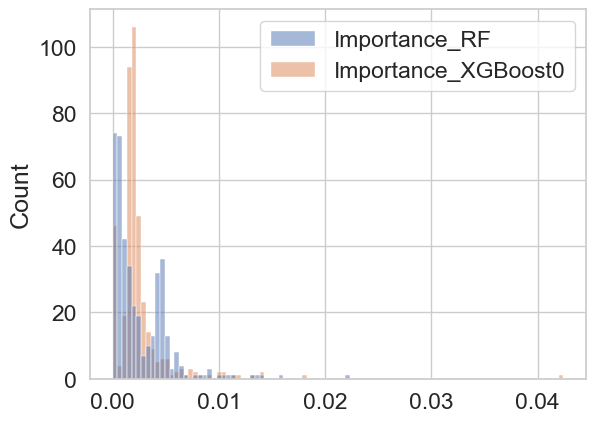

In [9]:
sns.histplot(data=[rf_df[rf_df.columns[1]], xgb0[xgb0.columns[1]]])
plt.show()

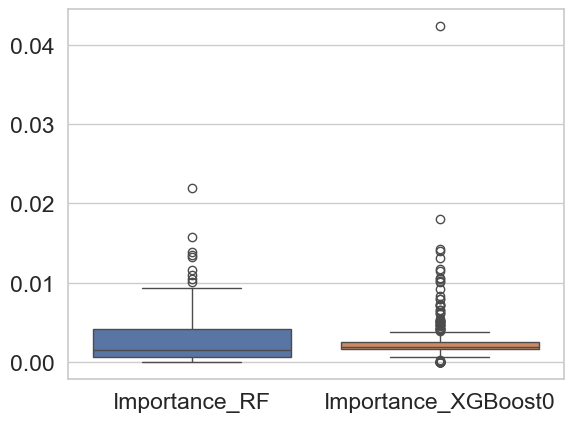

In [10]:
sns.boxplot(data=[rf_df[rf_df.columns[1]], xgb0[xgb0.columns[1]]])
plt.show()

# Importance Matrix

In [20]:
imp_df = pd.DataFrame(
    {
        'RF': list(rf_df[rf_df.columns[1]]),
        'XGBoost': list(xgb0[xgb0.columns[1]])
    },
    index=list(rf_df[rf_df.columns[0]])
)

In [21]:
imp_df.head()

,RF,XGBoost
kontoconnect.basicfeatures.basic_currencybalance_max,0.010,0.006
kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban,0.007,0.007
kontoconnect.basicfeatures.basic_maxratioposaccbalanceperaccount,0.006,0.004
kontoconnect.basicfeatures.basic_minsdposaccbalanceperaccount,0.005,0.003
kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount,0.006,0.007


# Spearman Correlation Matrix

Scipy Spearman: [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

In [27]:
imp_df.T

,kontoconnect.basicfeatures.basic_currencybalance_max,kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban,kontoconnect.basicfeatures.basic_maxratioposaccbalanceperaccount,kontoconnect.basicfeatures.basic_minsdposaccbalanceperaccount,kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount,kontoconnect.basicfeatures.basic_avgtransperday,kontoconnect.basicfeatures.basic_diffaccbalanceever,kontoconnect.basicfeatures.basic_diffaccbalanceever_filter4,kontoconnect.basicfeatures.basic_ratiocountabsamountmore10,kontoconnect.basicfeatures.basic_ratioabsamount100modulototal,kontoconnect.basicfeatures.basic_maxnchartitle,kontoconnect.basicfeatures.basic_maxratiodayswithtransactionalliban_filter4,kontoconnect.basicfeatures.basic_ratiocounttotalinflow,kontoconnect.basicfeatures.basic_minratiodayswithtransactionalliban,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore100total,kontoconnect.basicfeatures.basic_maxratioabove100accbalanceperaccount,kontoconnect.basicfeatures.basic_ratioposnegamount100modulo,kontoconnect.basicfeatures.basic_minratioabove100accbalanceperaccount,kontoconnect.basicfeatures.basic_ratioposamount100modulototal,kontoconnect.basicfeatures.basic_ratioabsamount100modulototal_filter4,kontoconnect.basicfeatures.basic_countabsamount100modulo_filter1,kontoconnect.basicfeatures.basic_rationchartitleover10,kontoconnect.basicfeatures.basic_ratiocounttotalinflow_filter4,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore100inflow,kontoconnect.basicfeatures.basic_ratioabsamount5modulobylevel,kontoconnect.basicfeatures.basic_histdurationall,kontoconnect.basicfeatures.basic_histdurationall_filter4,kontoconnect.basicfeatures.basic_ratiocountabsamountless1,kontoconnect.basicfeatures.basic_maxrationear0accbalanceperaccount_filter4,kontoconnect.basicfeatures.basic_maxratioabove1000accbalanceperaccount,kontoconnect.basicfeatures.basic_ratiocounttotalinflowmore10inflow,kontoconnect.basicfeatures.basic_ratiocounttotalinflowless10outflow,kontoconnect.basicfeatures.basic_countabsamountless1,kontoconnect.basicfeatures.basic_ratioabsamount5modulobylevel_filter4,kontoconnect.basicfeatures.basic_ratioposamount5modulobylevel,kontoconnect.basicfeatures.basic_ratiocountabsamountless1_filter4,kontoconnect.basicfeatures.basic_totaluniqueaccounts_full,kontoconnect.basicfeatures.basic_ratiocounttotalinflowless10outflow_filter4,kontoconnect.basicfeatures.basic_countabsamountless1_filter4,kontoconnect.basicfeatures.basic_ratiomedianaccbalanceperaccount,kontoconnect.categoryfeatures.freqcount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isRecurringExpense,kontoconnect.categoryfeatures.sddaysgap_isOtherExpense,kontoconnect.categoryfeatures.medianamount_isOtherTransferMethod,kontoconnect.categoryfeatures.medianamount_isRecurringExpense,kontoconnect.categoryfeatures.sddaysgap_isRecurringExpense,kontoconnect.categoryfeatures.avgsumdailyamount_isRecurringExpense,kontoconnect.categoryfeatures.ratiomaxminsumdailyamount_isOtherTransferMethod,kontoconnect.categoryfeatures.avgsumdailyamount_isOtherExpense,kontoconnect.categoryfeatures.maxabsamount_isRecurringExpense,kontoconnect.categoryfeatures.lastamount_isOtherTransferMethod,kontoconnect.categoryfeatures.ratiocount_isOtherExpense,kontoconnect.categoryfeatures.lastamount_isRecurringExpense,kontoconnect.categoryfeatures.meandaysgap_isRecurringExpense,kontoconnect.categoryfeatures.ratiomaxminamount_isOtherTransferMethod,kontoconnect.categoryfeatures.lastamount_isOtherExpense,kontoconnect.categoryfeatures.ratiomaxminamount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isOtherExpense,kontoconnect.categoryfeatures.avgdailyamount_isOtherTransferMethod,kontoconnect.categoryfeatures.meandaysgap_isOtherExpense,kontoconnect.categoryfeatures.ratiocount_isRecurringExpense,kontoconnect.categoryfeatures.meanamount_isOtherTransferMethod,kontoconnect.categoryfeatures.sddaysgap_isOtherTransferMethod,kontoconnect.categoryfeatures.ratiocount_isOtherTransferMetho

In [28]:
stat, pval = stats.spearmanr(imp_df.T)

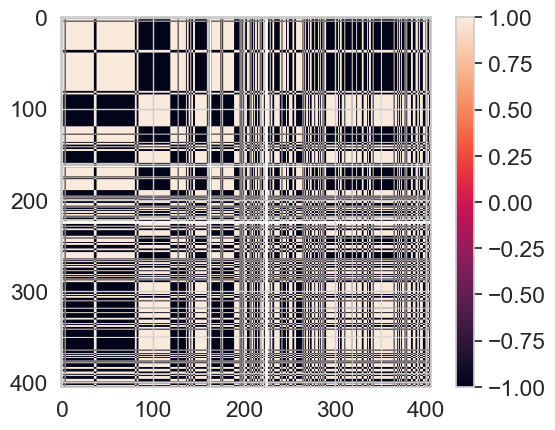

In [32]:
plt.imshow(stat)
plt.colorbar()